<a href="https://colab.research.google.com/github/IvannikovG/torch_refreshing/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
learn_what = {1: 'data (preparing and loading)',
              2: 'build model',
              3: 'fitting the model to data (training)',
              4: 'making predictions and evaluating the model',
              5: 'saving and loading a model',
              6: 'putting it all together'}

learn_what

{1: 'data (preparing and loading)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [63]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [64]:
torch.__version__

'2.1.0+cu121'

In [65]:
# DATA. Prepare and load

# -> Data can be anything (img, vid, table, sequential data, DNA, text)

In [66]:
# Use linear regression formula to make a straight line with known parameters

In [99]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

y, len(y), len(X)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 50,
 50)

In [68]:
# Splitting data into training and test sets

In [69]:
# data in three sets - training(r) (lectures), validation(o) (test exam), test(r) (final exam)

# 1. Generalization - ability of the model to perform on real data.

In [70]:
# create a train/test split

In [71]:
train_split = int(0.8 * len(X))
# f, l = features, labels
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

X_test, X

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]))

In [72]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  '''Plots training data, test data and compares predictions'''

  plt.figure(figsize=(10, 7))

  # Plot training data is in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  # Plot test data in green

  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=3, label='Predictions')

  plt.legend(prop={"size": 14,});


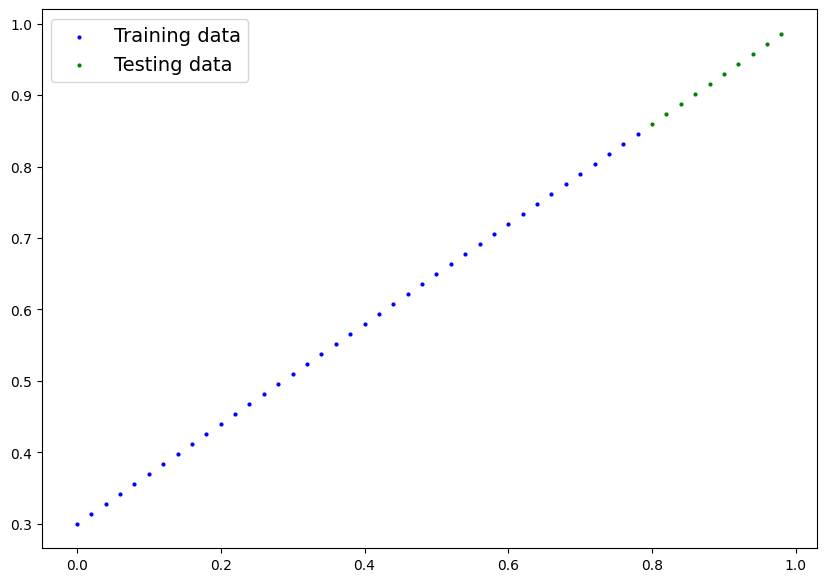

In [73]:
plot_predictions()

In [74]:
# Build a model
# linear regression model

In [75]:
# almost anything is inherited from nn.Module in torch - base class for all nn.Models

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # parameters in nn, auto assigns weights to .parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula


# Start with random w and b, look at training data and adjust
# the random values to better represent the ideal values (the weights and the bias we used to create data)

# 2 main things - gradient descent and back propagation

In [76]:
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1
streetlights = np.array([[ 1, 0, 1 ],
                         [ 0, 1, 1 ],
                         [ 0, 0, 1 ],
                         [ 1, 1, 1 ],
                         [ 0, 1, 1 ],
                         [1, 0, 1]])

walk_vs_stop = np.array([0, 1, 0, 1, 1, 0])
input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for iteration in range(10):
  error_for_all_lights = 0
  for row_index in range(len(streetlights)):
    input = streetlights[row_index]
    goal_prediction = walk_vs_stop[row_index]
    prediction = input.dot(weights)
    error = (goal_prediction - prediction) ** 2
    error_for_all_lights += error
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input * delta))
    print("Prediction:" + str(prediction))
  print("Error:" + str(error_for_all_lights) + "\n")

print(weights)

Prediction:-0.19999999999999996
Prediction:-0.19999999999999996
Prediction:-0.5599999999999999
Prediction:0.6160000000000001
Prediction:0.17279999999999995
Prediction:0.17552
Error:2.6561231104

Prediction:0.14041599999999999
Prediction:0.3066464
Prediction:-0.34513824
Prediction:1.006637344
Prediction:0.4785034751999999
Prediction:0.26700416768
Error:0.9628701776715985

Prediction:0.213603334144
Prediction:0.5347420299776
Prediction:-0.26067345110016
Prediction:1.1319428845096962
Prediction:0.6274723921901568
Prediction:0.25433999330650114
Error:0.5509165866836797

Prediction:0.20347199464520088
Prediction:0.6561967149569552
Prediction:-0.221948503950995
Prediction:1.166258650532124
Prediction:0.7139004922542389
Prediction:0.21471099528371604
Error:0.36445836852222424

Prediction:0.17176879622697283
Prediction:0.7324724146523222
Prediction:-0.19966478845083285
Prediction:1.1697769945341199
Prediction:0.7719890116601171
Prediction:0.17297997428859369
Error:0.2516768662079895

Predictio

In [77]:
def matmul(x, y):
  assert(len(x) == len(y))
  a = 0
  for i in range(len(x)):
    a += x[i] * y[i]
  return a

def matrix_matmul(v, matrix):
  acc = []
  for i in range(len(matrix)):
    acc.append(matmul(v, matrix[i]))
  return acc

def neural_net(input, weights):
  return matrix_matmul(input, weights)




In [78]:
neural_net([1, 0, 1], [[0.1, 0.82, 0.08], [0.1, 0.02, -0.1], [0.5, 0.2, -0.51]])

[0.18, 0.0, -0.010000000000000009]

In [79]:
# Create random seed

torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [81]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

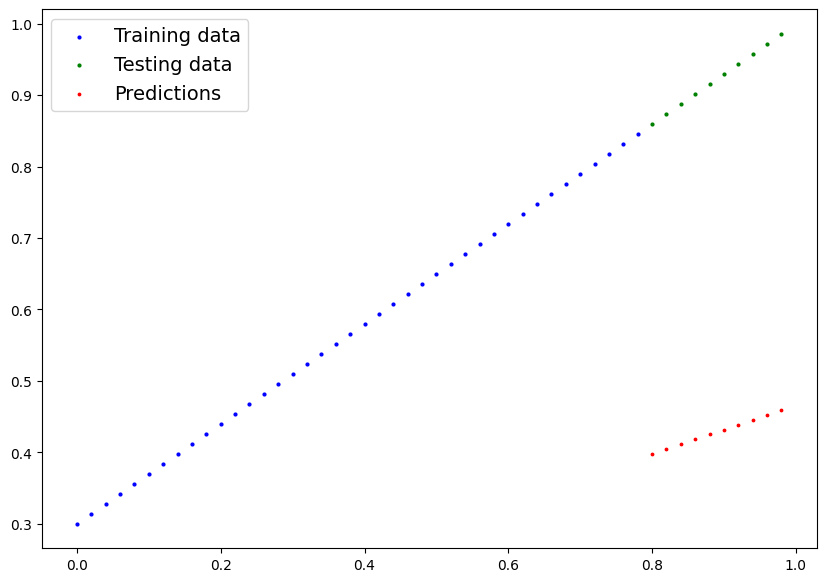

In [103]:
plot_predictions(predictions=y_preds)

In [83]:
# loss function

loss_fn = nn.L1Loss() # MSE

# setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.05)

# building a training loop
epochs = 1 # one full loop through the data

for epoch in range(epochs):
  model_0.train() # train mode in PyTorch sets all parameters that require gradient to have a gradient
  model_0.eval() # turns off gradient tracking

  if (epoch % 10 == 0):
    print(epoch)




0


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define some training data
# X = torch.tensor([[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]])
# y = torch.tensor([[2.0, 2.0], [4.0, 4.0], [6.0, 6.0], [8.0, 8.0]])

X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

def reset_model_parameters(model):
    for param in model.parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)

# Example usage:
# Assuming you have a model named 'model'

# Define a simple linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        # self.linear = nn.Linear(2, 2)  # Input size: 2, Output size: 2
        # self.linear = nn.Linear(2, 1)  # Input size: 2, Output size: 1
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegression()
reset_model_parameters(model)

# Define a loss function (mean squared error)
loss_function = nn.MSELoss()

# Define an optimizer (stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)

    # Compute the loss
    loss = loss_function(predictions, y)

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Print the trained parameters
print('Trained parameters:')
for name, param in model.named_parameters():
    print(name, param.data)

Epoch [10/500], Loss: 1.1696
Epoch [20/500], Loss: 0.0846
Epoch [30/500], Loss: 0.0534
Epoch [40/500], Loss: 0.0496
Epoch [50/500], Loss: 0.0467
Epoch [60/500], Loss: 0.0440
Epoch [70/500], Loss: 0.0414
Epoch [80/500], Loss: 0.0390
Epoch [90/500], Loss: 0.0367
Epoch [100/500], Loss: 0.0346
Epoch [110/500], Loss: 0.0326
Epoch [120/500], Loss: 0.0307
Epoch [130/500], Loss: 0.0289
Epoch [140/500], Loss: 0.0272
Epoch [150/500], Loss: 0.0256
Epoch [160/500], Loss: 0.0241
Epoch [170/500], Loss: 0.0227
Epoch [180/500], Loss: 0.0214
Epoch [190/500], Loss: 0.0202
Epoch [200/500], Loss: 0.0190
Epoch [210/500], Loss: 0.0179
Epoch [220/500], Loss: 0.0168
Epoch [230/500], Loss: 0.0159
Epoch [240/500], Loss: 0.0149
Epoch [250/500], Loss: 0.0141
Epoch [260/500], Loss: 0.0133
Epoch [270/500], Loss: 0.0125
Epoch [280/500], Loss: 0.0118
Epoch [290/500], Loss: 0.0111
Epoch [300/500], Loss: 0.0104
Epoch [310/500], Loss: 0.0098
Epoch [320/500], Loss: 0.0092
Epoch [330/500], Loss: 0.0087
Epoch [340/500], Lo

In [115]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)



# Instantiate the model
model_0 = LinearRegressionModel()
reset_model_parameters(model)

# Define a loss function (mean squared error)
loss_function = nn.MSELoss()

# Define an optimizer (stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    model_0.train()
    predictions = model(X_train)

    # Compute the loss
    loss = loss_function(predictions, y)

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Print the trained parameters
print('Trained parameters:')
for name, param in model.named_parameters():
    print(name, param.data)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([40])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/500], Loss: 21.3888
Epoch [20/500], Loss: 15.3087
Epoch [30/500], Loss: 11.5046
Epoch [40/500], Loss: 9.1242
Epoch [50/500], Loss: 7.6343
Epoch [60/500], Loss: 6.7014
Epoch [70/500], Loss: 6.1169
Epoch [80/500], Loss: 5.7503
Epoch [90/500], Loss: 5.5201
Epoch [100/500], Loss: 5.3752
Epoch [110/500], Loss: 5.2836
Epoch [120/500], Loss: 5.2255
Epoch [130/500], Loss: 5.1882
Epoch [140/500], Loss: 5.1641
Epoch [150/500], Loss: 5.1481
Epoch [160/500], Loss: 5.1373
Epoch [170/500], Loss: 5.1297
Epoch [180/500], Loss: 5.1242
Epoch [190/500], Loss: 5.1199
Epoch [200/500], Loss: 5.1165
Epoch [210/500], Loss: 5.1136
Epoch [220/500], Loss: 5.1110
Epoch [230/500], Loss: 5.1087
Epoch [240/500], Loss: 5.1065
Epoch [250/500], Loss: 5.1045
Epoch [260/500], Loss: 5.1025
Epoch [270/500], Loss: 5.1006
Epoch [280/500], Loss: 5.0987
Epoch [290/500], Loss: 5.0969
Epoch [300/500], Loss: 5.0951
Epoch [310/500], Loss: 5.0934
Epoch [320/500], Loss: 5.0917
Epoch [330/500], Loss: 5.0900
Epoch [340/500],

In [85]:
# Testing loop

In [86]:
X, X_test

(tensor([[1.],
         [2.],
         [3.],
         [4.]]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]))

In [121]:
with torch.inference_mode():
  y_preds_new = model_0(torch.tensor([1]))
  test_loss = loss_fn(y_preds_new, y_test)
  print(f'{test_loss}, {y_preds_new}')

1.9026552438735962, tensor([2.8257])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [118]:
X_test

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])

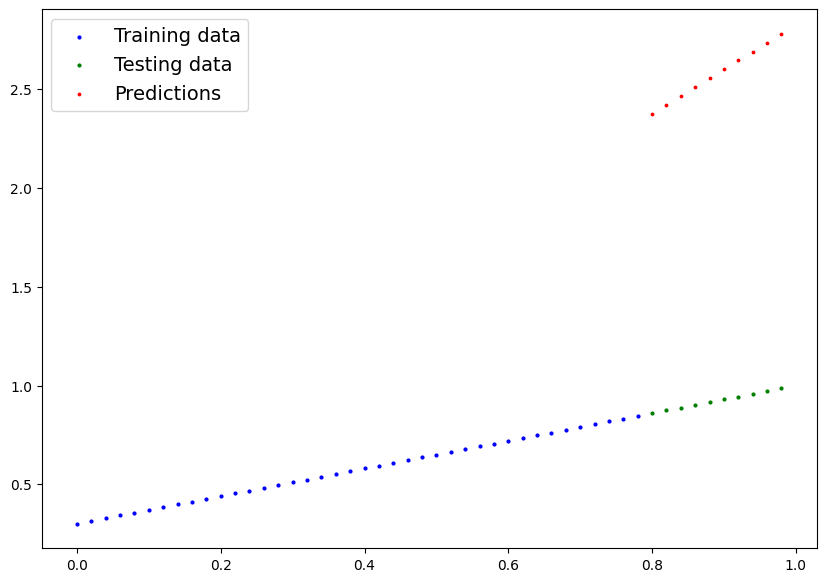

In [120]:
plot_predictions(predictions=y_preds_new)

In [ ]:
epochs = 1

for epoch in range(epochs):

  # 1. get predictions
  predictions = model_0(X_train)
  # 2. calculate error (loss)
  loss = loss_fn(predictions, y_train)
  # 3. optmizer drop grad, not to accumulate optimizer changes
  optimizer.zero_grad()
  # 4. perform backpropagation
  loss.backward()
  # 5. step the optimizer to update weights
  optimizer.step()